In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory( '/content/drive/MyDrive/train',
  labels="inferred", label_mode="categorical",
  class_names=None,
  color_mode="rgb",
  batch_size=32,
  image_size=(64, 64),
  shuffle=True,
  seed=None,
  validation_split=None,
  subset=None,
  interpolation="bilinear", follow_links=False, crop_to_aspect_ratio=False )

Found 3115 files belonging to 36 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory( '/content/drive/MyDrive/validation',
labels="inferred",
label_mode="categorical",
class_names=None,
color_mode="rgb",
batch_size=32,
image_size=(64, 64),
shuffle=True,
seed=None,
validation_split=None,
subset=None,
interpolation="bilinear",
follow_links=False,
crop_to_aspect_ratio=False )

Found 351 files belonging to 36 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 86s 835ms/step - loss: 2.1933 - accuracy: 0.3843 - val_loss: 1.8637 - val_accuracy: 0.5128
Epoch 2/32
98/98 [==============================] - 91s 881ms/step - loss: 2.1018 - accuracy: 0.4205 - val_loss: 1.8083 - val_accuracy: 0.5271
Epoch 3/32
98/98 [==============================] - 84s 824ms/step - loss: 2.0162 - accuracy: 0.4427 - val_loss: 1.8307 - val_accuracy: 0.5214
Epoch 4/32
98/98 [==============================] - 84s 821ms/step - loss: 1.9847 - accuracy: 0.4408 - val_loss: 1.7358 - val_accuracy: 0.5556
Epoch 5/32
98/98 [==============================] - 84s 819ms/step - loss: 1.9119 - accuracy: 0.4642 - val_loss: 1.8533 - val_accuracy: 0.5356
Epoch 6/32
98/98 [==============================] - 85s 822ms/step - loss: 1.9129 - accuracy: 0.4754 - val_loss: 1.7057 - val_accuracy: 0.5584
Epoch 7/32
98/98 [==============================] - 85s 827ms/step - loss: 1.8150 - accuracy: 0.4992 - val_loss: 1.5591 - val_accuracy: 0.6011

In [19]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
training_history.history #Return Dictionary of history

{'loss': [2.193345308303833,
  2.10176682472229,
  2.016213893890381,
  1.9846765995025635,
  1.9119112491607666,
  1.9129232168197632,
  1.8150124549865723,
  1.763753890991211,
  1.757123589515686,
  1.6940239667892456,
  1.5648680925369263,
  1.532785177230835,
  1.4440988302230835,
  1.4641631841659546,
  1.453743815422058,
  1.3998854160308838,
  1.259494423866272,
  1.2815605401992798,
  1.2612009048461914,
  1.2214857339859009,
  1.234278678894043,
  1.1197571754455566,
  1.100319743156433,
  1.0495270490646362,
  1.0753132104873657,
  0.9586024284362793,
  0.9397112131118774,
  0.9146088361740112,
  0.8762921094894409,
  0.8897489905357361,
  0.901391327381134,
  0.8343263268470764],
 'accuracy': [0.384269654750824,
  0.420545756816864,
  0.44269663095474243,
  0.4407704770565033,
  0.46420544385910034,
  0.47544142603874207,
  0.49919742345809937,
  0.5033707618713379,
  0.516853928565979,
  0.5268057584762573,
  0.5621187686920166,
  0.577207088470459,
  0.5884430408477783,
 

In [ ]:
#training_history.history['accuracy']

In [21]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [22]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [28]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 81.76637887954712 %


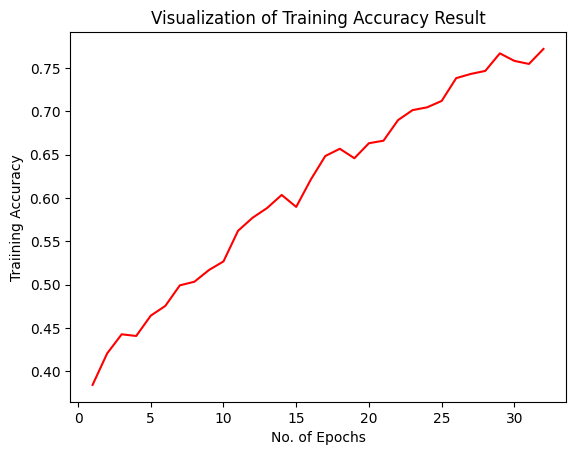

In [46]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()


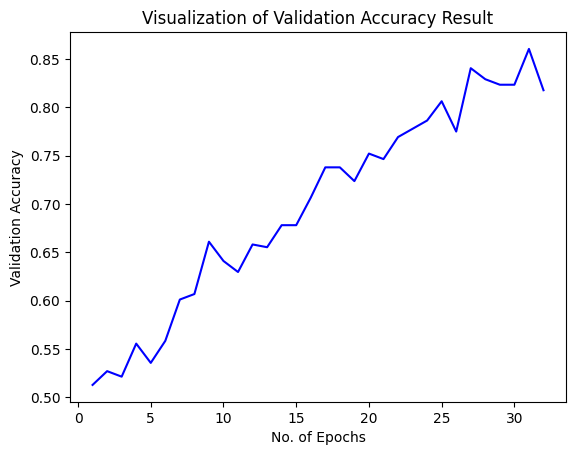

In [47]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()


In [49]:
test_set = tf.keras.utils.image_dataset_from_directory( '/content/drive/MyDrive/test',
labels="inferred",
label_mode="categorical",
class_names=None,
color_mode="rgb",
batch_size=32,
image_size=(64, 64),
shuffle=True, seed=None, validation_split=None, subset=None, interpolation="bilinear", follow_links=False, crop_to_aspect_ratio=False )

Found 359 files belonging to 36 classes.


In [51]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 49s 928ms/step - loss: 0.9926 - accuracy: 0.8162
Test accuracy: 0.8161559700965881
